# Hotdog image classifier

## Task
Task is determine whether there is a hotdog in the image. 

In [53]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Helper-functions for loading data

In [2]:
def describe_subfolder(df, folder, subfolder, cl):
    """
    Fill pandas DataFrame with images filename and their classes.

    Args:
        df: pandas DataFrame with two columns. New information will be added to this DataFrame.
        folder: Main folder in which dataset is located
        subfolder: Subfolder for images of one class
        cl: index or name of class
        
    Returns:
        Dataframe with new information about images of one class

    Raises:
        RuntimeError: Raises an exception if input folder has incorrect format.
    """
    path = os.path.join(folder, subfolder)
    if not os.path.isdir(path):
        raise RuntimeError("'{}' doesn't have '{}' subfolder".format(folder, subfolder))
    if len(os.listdir(path)) == 0:
        raise RuntimeError("There are no images in '{}'".format(path))
    for name in os.listdir(path):
        df.loc[len(df)] = (os.path.join(path, name), cl)
    return df

def make_df(path):
    """
    Load train dataset and make pandas data frame with images filename and their classes.

    Args:
        path: Path to folder this training images.
            Folder should have the following structure:
                ├── path
                │   ├── hotdog
                │   │   ├── hotdog_image1.jpg
                │   │   ├── hotdog_image2.jpg
                │   │   ├── .................
                │   └── not_hotdog
                │       ├── not_hotdog_image1.jpg
                │       ├── not_hotdog_image2.jpg
                │       ├── .....................

    Returns:
        Dataframe with following columns: "name", "class".
            "name" - path to image,
            "class" - class of image: 1 - hotdog, 0 - not hotdog.

    Raises:
        RuntimeError: Raises an exception if input folder has incorrect format.
    """
    df = pd.DataFrame(columns = ["name", "class"])
    # Hotdog images
    df = describe_subfolder(df, path, 'hotdog', 1)
    # Not hotdog images
    df = describe_subfolder(df, path, 'not_hotdog', 0)
    
    return df

In [3]:
from collections import namedtuple

DataItem = namedtuple("DataItem", ["image", "cl"])

def load_dataset(df):
    """
    Load images described in pandas DataFrame.

    Args:
        df: pandas DataFrame with 'name' column. Column 'class' is optional

    Returns:
        List of DataItem. Each DataItem contains following elements:
            'image' - image in numpy array format
            'cl' - name of image class. None if DataFrame doesn't have column 'class'

    Raises:
        RuntimeError: Raises an exception if DataFrame has incorrect format
            or failed to load image.
    """
    if not 'name' in df.columns:
        raise RuntimeError("DataFrame has incorrect format. It should have column 'name'")
        
    dataset = []
    for index, row in df.iterrows():
        name = row["name"]
        if "class" in df.columns:
            cl = row["class"]
        else:
            cl = None
        # Load image
        img = cv2.imread(name)
        if img is None:
            raise RuntimeError("Failed to load image: {}".format(name))
        dataset.append(DataItem(img, cl))
        
    return dataset

In [4]:
def print_dataset_info(df):
    """
    Print number of samples for each class in dataset.
    
    Args:
        df: pandas DataFrame with 'class' column
    
    Raises:
        RuntimeError: Raises an exception if DataFrame has incorrect format
    """
    if not "class" in df.columns:
        raise RuntimeError("DataFrame has incorrect format. IT should have column 'class'")
        
    print("Number of samples: {}".format(len(df)))
    print("    Hotdogs: {}".format(sum(df["class"] == 1)))
    print("    Not hotdogs: {}".format(sum(df["class"] == 0)))

## Load train data

In [5]:
# Make DataFrame
train_dataframe = make_df('./data/train')
print_dataset_info(train_dataframe)
train_dataframe.head(10)

Number of samples: 1671
    Hotdogs: 708
    Not hotdogs: 963


,name,class
0,./data/train/hotdog/00529.jpg,1
1,./data/train/hotdog/00731.jpg,1
2,./data/train/hotdog/00062.jpg,1
3,./data/train/hotdog/00381.jpg,1
4,./data/train/hotdog/00372.jpg,1
5,./data/train/hotdog/00732.jpg,1
6,./data/train/hotdog/00433.jpg,1
7,./data/train/hotdog/00532.jpg,1
8,./data/train/hotdog/00667.jpg,1
9,./data/train/hotdog/00101.jpg,1


In [6]:
# Save DateFrame to csv file
train_dataframe.to_csv('train.csv', index=False, columns=['name', 'class'])

In [7]:
# Load images
train_dataset = load_dataset(train_dataframe)

## Helper-functions for plotting images

In [8]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3, figsize = (10, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "Class: {}".format("hotdog" if cls_true[i] == 1 else "not hotdog")
        else:
            xlabel = "True: {}, Pred: {}".format("hotdog" if cls_true[i] == 1 else "not hotdog",
                                                 "hotdog" if cls_pred[i] == 1 else "not hotdog")

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [9]:
def random_sample(dataset, count=9):
    images = []
    cls = []
    for _ in range(count):
        indx = np.random.choice(range(len(dataset)))
        images.append(dataset[indx].image)
        cls.append(dataset[indx].cl)
    return images, cls

## Show data examples

In [10]:
sample_images, sample_cls = random_sample(train_dataset)

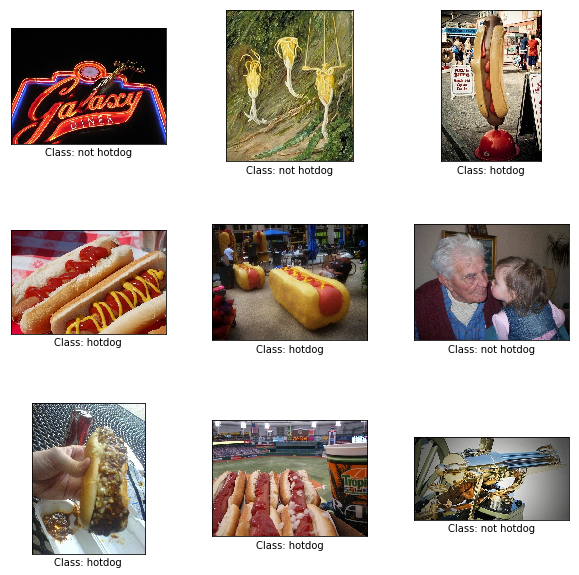

In [17]:
plot_images(sample_images, sample_cls)

C [ImageNet](http://www.image-net.org/) было найдено по запросам “hotdog”, “chili dog” и “frankfurter” было найдено 2300 изображение "хотдогов"
По запросам “food”, “furniture”, “people” и “pets” 2300 "Не хотдогов"

In [10]:
# Make DataFrame
valid_dataframe = make_df('./data/valid')
print_dataset_info(valid_dataframe)
valid_dataframe.head(10)

Number of samples: 4600
    Hotdogs: 2300
    Not hotdogs: 2300


,name,class
0,./data/valid/hotdog/786.jpg,1
1,./data/valid/hotdog/876.jpg,1
2,./data/valid/hotdog/2283.jpg,1
3,./data/valid/hotdog/1244.jpg,1
4,./data/valid/hotdog/45.jpg,1
5,./data/valid/hotdog/847.jpg,1
6,./data/valid/hotdog/189.jpg,1
7,./data/valid/hotdog/1075.jpg,1
8,./data/valid/hotdog/458.jpg,1
9,./data/valid/hotdog/2233.jpg,1


In [11]:
# Save DateFrame to csv file
valid_dataframe.to_csv('valid.csv', index=False, columns=['name', 'class'])

In [12]:
# Load images
valid_dataset = load_dataset(valid_dataframe)

## Проверяем выборочно корректность данных

In [23]:
sample_images, sample_cls = random_sample(valid_dataset)

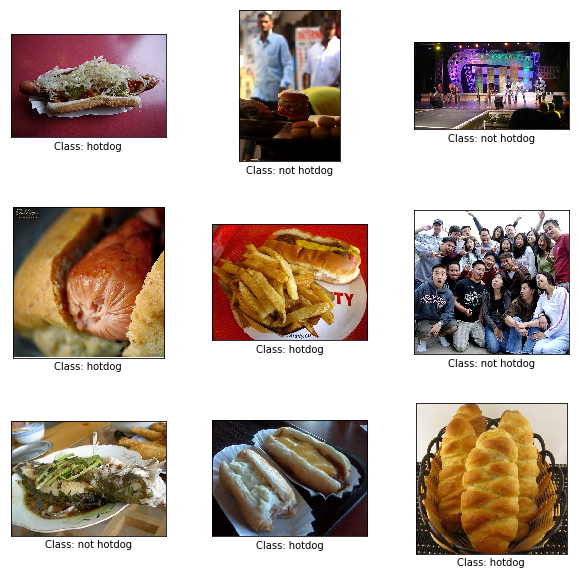

In [24]:
plot_images(sample_images, sample_cls)

## Пробуем классифицировать

In [51]:
def accuracy(y_true, y_predict):
    y_true = np.array(y_true).reshape([-1])
    y_predict = np.array(y_predict).reshape([-1])
    if y_true.shape != y_predict.shape:
        raise RuntimeError("Vector with ground truth and predicted values should have same sizes")
    if y_true.shape[0] == 0:
        raise RuntimeError("Vector size should be greater than zero")
    return sum(y_true == y_predict) / float(len(y_true)) * 100

## Classical machine learning algorithm

#### Пробуем изображение в градациях серого для построения классификатора 


In [26]:
def mean_gray_data(dataset):
    X = []
    y = []
    for item in dataset:
        X.append(np.average(cv2.cvtColor(item.image, cv2.COLOR_BGR2GRAY)))
        y.append(item.cl)
    return np.array(X).reshape([-1, 1]), np.array(y)

In [27]:
X_train, y_train = mean_gray_data(train_dataset)

In [28]:
X_valid, y_valid = mean_gray_data(valid_dataset)

### K nearest neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Train clasifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
# Predict
y_valid_predict = clf.predict(X_valid)

In [32]:
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 56.72%


#### try to find best number of neighbors

In [33]:
valid_scores = []
train_scores = []
grid = range(1, 20)
for n_neighbors in grid:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))

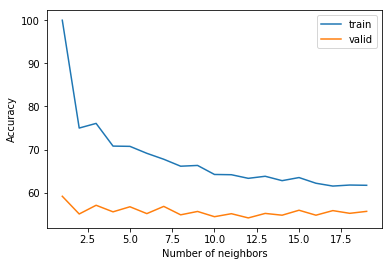

Best accuracy: 59.15%, number of neighbors = 1


In [34]:
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of neighbors = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

### Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Train classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
# Predict
y_valid_predict = clf.predict(X_valid)

In [38]:
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 59.15%


#### try to find best depth of tree

In [39]:
valid_scores = []
train_scores = []
grid = range(1, 20)
for max_depth in grid:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))

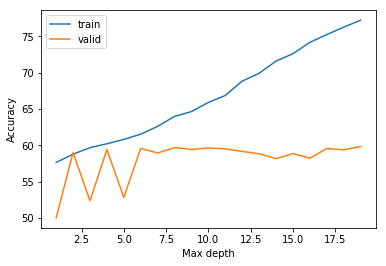

Best accuracy: 59.83%, max depth = 19


In [40]:
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, max depth = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

####  try use mean value of RGB image for build classifier


In [41]:
def mean_bgr_data(dataset):
    X = []
    y = []
    for item in dataset:
        X.append(np.average(item.image, axis=(0,1)))
        y.append(item.cl)
    return np.array(X), np.array(y)

In [42]:
X_train, y_train = mean_bgr_data(train_dataset)

In [43]:
X_valid, y_valid = mean_bgr_data(valid_dataset)

#### K nearest neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Train clasifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
# Predict
y_valid_predict = clf.predict(X_valid)

In [47]:
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 66.09%


#### try to find best number of neighbors

In [48]:
valid_scores = []
train_scores = []
grid = range(1, 20)
for n_neighbors in grid:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))

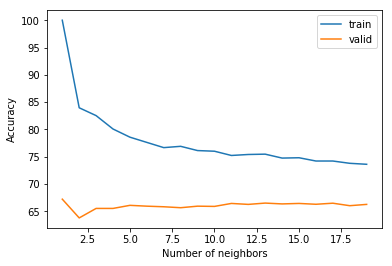

Best accuracy: 67.22%, number of neighbors = 1


In [49]:
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of neighbors = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Train classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
# Predict
y_valid_predict = clf.predict(X_valid)

In [53]:
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 65.33%


####  try to find best depth of tree

In [54]:
valid_scores = []
train_scores = []
grid = range(1, 20)
for max_depth in grid:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))

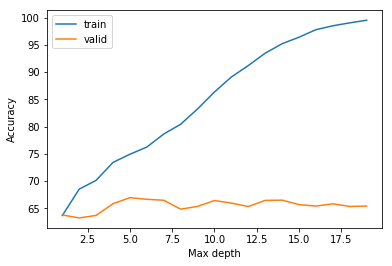

Best accuracy: 66.96%, max depth = 5


In [55]:
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, max depth = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### add features from Canny

In [56]:
def mean_canny_data(dataset):
    X = []
    y = []
    for item in dataset:
        # BGR features
        bgr_features = np.average(item.image, axis=(0,1)).reshape([-1, 3])
        # grayscale features
        gray = cv2.cvtColor(item.image, cv2.COLOR_BGR2GRAY)
        grayscale_features = np.average(gray).reshape([-1, 1])
        # canny features
        canny = cv2.Canny(gray,100,200)
        canny_features = np.average(canny).reshape([-1, 1])
        X.append(np.concatenate([bgr_features, grayscale_features, canny_features], axis=1).reshape([-1]))
        y.append(item.cl)
    return np.array(X), np.array(y)

In [57]:
X_train, y_train = mean_canny_data(train_dataset)

In [58]:
X_valid, y_valid = mean_canny_data(valid_dataset)

#### K nearest neighbors

In [59]:
# Train clasifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
# Predict
y_valid_predict = clf.predict(X_valid)

In [61]:
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 72.24%


####  find best number of neighbors

In [62]:
valid_scores = []
train_scores = []
grid = range(1, 30)
for n_neighbors in grid:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))

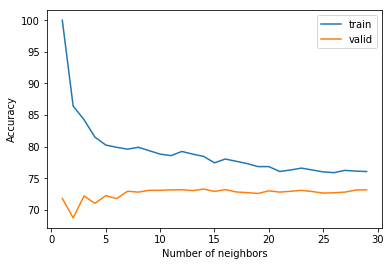

Best accuracy: 73.28%, number of neighbors = 14


In [63]:
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of neighbors = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

### Fix size of images

In [14]:
def resize_dataset(dataset, size):
    resized_dataset = []
    for item in dataset:
        resized_image = cv2.resize(item.image, size)
        resized_dataset.append(DataItem(resized_image, item.cl))
    return resized_dataset

In [15]:
def reshape_data(dataset):
    X = []
    y = []
    for item in dataset:
        X.append(item.image.reshape([-1]))
        y.append(item.cl)
    return np.array(X), np.array(y)

#### Let's try to use size = 4x4

In [13]:
train_dataset4x4 = resize_dataset(train_dataset, (4, 4))
X_train, y_train = reshape_data(train_dataset4x4)

In [14]:
valid_dataset4x4 = resize_dataset(valid_dataset, (4, 4))
X_valid, y_valid = reshape_data(valid_dataset4x4)

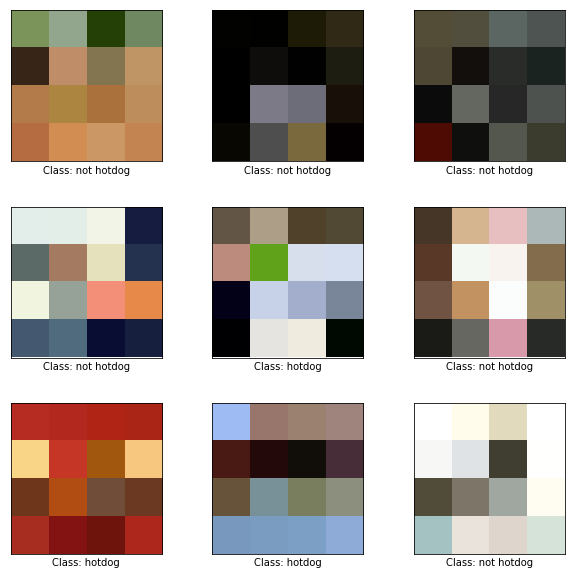

In [83]:
# Train examples
sample_images, sample_cls = random_sample(train_dataset4x4)
plot_images(sample_images, sample_cls)

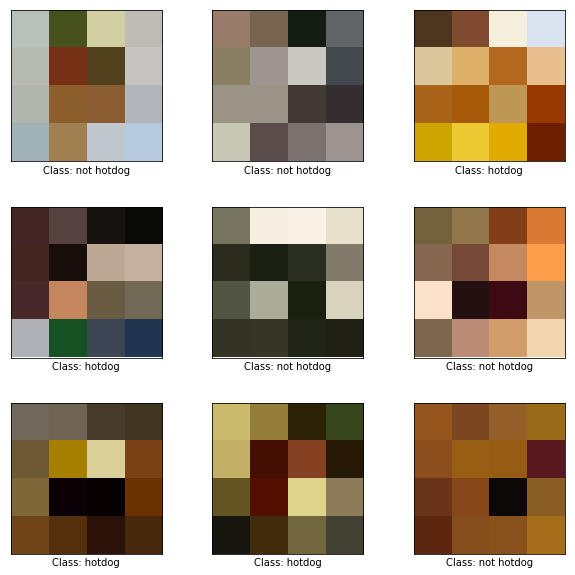

In [84]:
# Validation examples
sample_images, sample_cls = random_sample(valid_dataset4x4)
plot_images(sample_images, sample_cls)

#### K nearest neighbors

Accuracy: 63.85%


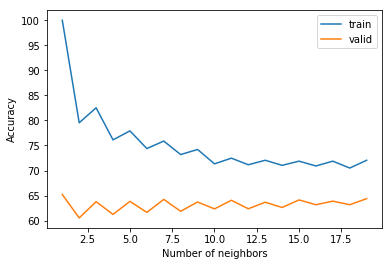

Best accuracy: 65.22%, number of neighbors = 1


In [85]:
from sklearn.neighbors import KNeighborsClassifier
# Train clasifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best parameters
valid_scores = []
train_scores = []
grid = range(1, 20)
for n_neighbors in grid:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
# Plot results 
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of neighbors = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### Decision tree

Accuracy: 67.39%


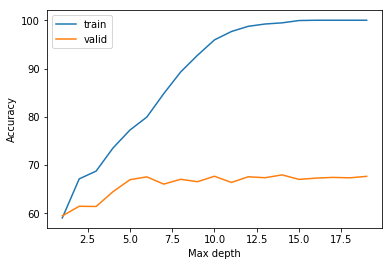

Best accuracy: 67.98%, max depth = 14


In [86]:
from sklearn.tree import DecisionTreeClassifier
# Train classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best parameters
valid_scores = []
train_scores = []
grid = range(1, 20)
for max_depth in grid:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
 # Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, max depth = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

### AdaBoost

Accuracy: 70.39%


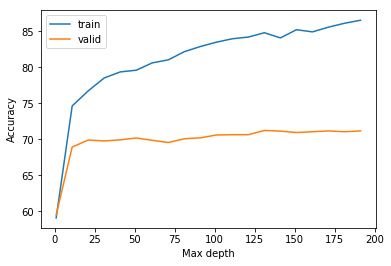

Best accuracy: 71.22%, number of tree = 131


In [97]:
from sklearn.ensemble import AdaBoostClassifier
# Train classifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best tree count
valid_scores = []
train_scores = []
grid = range(1, 200, 10)
for n_estimators in grid:
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
 # Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of tree = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

### Gradient Boosting

Accuracy: 74.41%


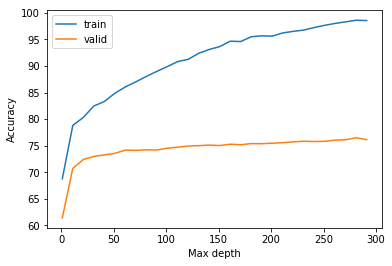

Best accuracy: 76.50%, number of tree = 281


In [108]:
#USE XGBoost
from xgboost import XGBClassifier
# Train classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best tree count
valid_scores = []
train_scores = []
grid = range(1, 300, 10)
for n_estimators in grid:
    clf = XGBClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
 # Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of tree = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

### CatBoost

In [117]:
from catboost import CatBoostClassifier
# Train classifier
clf = CatBoostClassifier(verbose=False)
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 76.89%


#### Let's try to use size = 32x32

In [20]:
train_dataset32x32 = resize_dataset(train_dataset, (32, 32))
X_train, y_train = reshape_data(train_dataset32x32)

In [21]:
valid_dataset32x32 = resize_dataset(valid_dataset, (32, 32))
X_valid, y_valid = reshape_data(valid_dataset32x32)

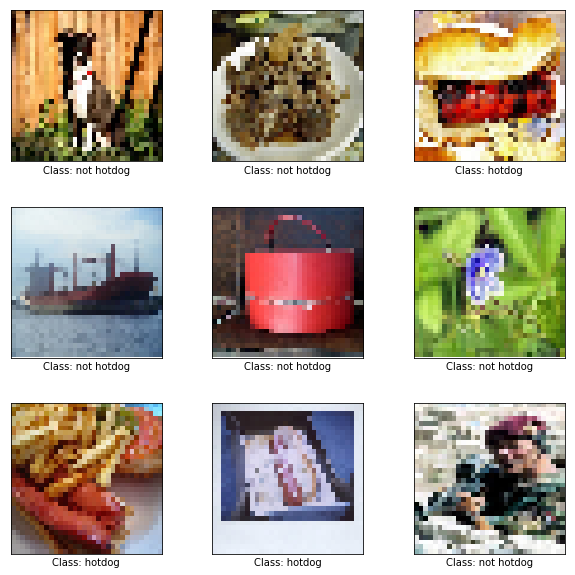

In [121]:
# Train examples
sample_images, sample_cls = random_sample(train_dataset32x32)
plot_images(sample_images, sample_cls)

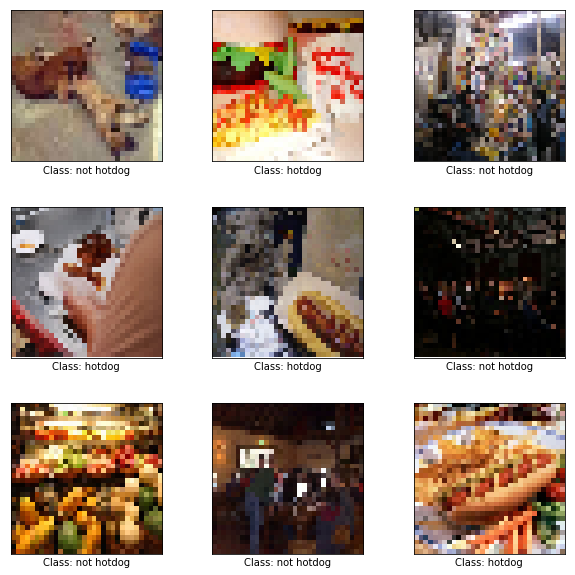

In [122]:
# Validation examples
sample_images, sample_cls = random_sample(valid_dataset32x32)
plot_images(sample_images, sample_cls)

#### KNN

Accuracy: 64.91%


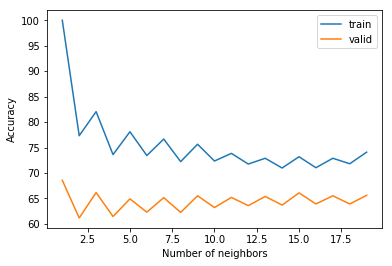

Best accuracy: 68.57%, number of neighbors = 1


In [123]:
from sklearn.neighbors import KNeighborsClassifier
# Train clasifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best parameters
valid_scores = []
train_scores = []
grid = range(1, 20)
for n_neighbors in grid:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
# Plot results 
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of neighbors = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### Decision tree

Accuracy: 68.70%


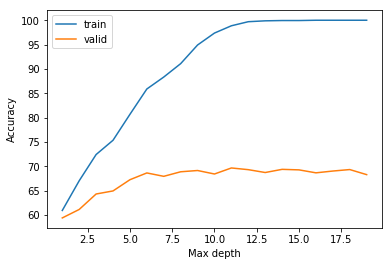

Best accuracy: 69.65%, max depth = 11


In [124]:
from sklearn.tree import DecisionTreeClassifier
# Train classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best parameters
valid_scores = []
train_scores = []
grid = range(1, 20)
for max_depth in grid:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
# Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, max depth = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### AdaBoost

Accuracy: 71.72%


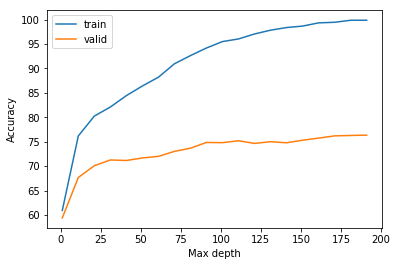

Best accuracy: 76.35%, number of tree = 191


In [125]:
from sklearn.ensemble import AdaBoostClassifier
# Train classifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best tree count
valid_scores = []
train_scores = []
grid = range(1, 200, 10)
for n_estimators in grid:
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
# Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of tree = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### XGBoost

Accuracy: 80.00%


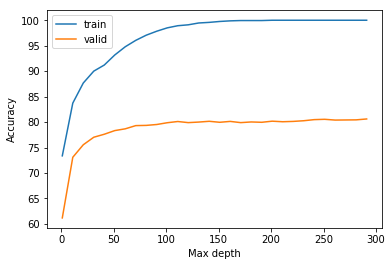

Best accuracy: 80.61%, number of tree = 291


In [127]:
from xgboost import XGBClassifier
# Train classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best tree count
valid_scores = []
train_scores = []
grid = range(1, 300, 10)
for n_estimators in grid:
    clf = XGBClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
# Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of tree = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

#### CatBoost

In [128]:
from catboost import CatBoostClassifier
# Train classifier
clf = CatBoostClassifier(verbose=False)
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))


Iteration with suspicious time -2.68 sec ignored in overall statistics.

Iteration with suspicious time -2.7 sec ignored in overall statistics.

Iteration with suspicious time -2.68 sec ignored in overall statistics.

Iteration with suspicious time -2.68 sec ignored in overall statistics.

Iteration with suspicious time -2.7 sec ignored in overall statistics.

Iteration with suspicious time -2.7 sec ignored in overall statistics.

Iteration with suspicious time -2.7 sec ignored in overall statistics.

Iteration with suspicious time -2.7 sec ignored in overall statistics.

Iteration with suspicious time -2.68 sec ignored in overall statistics.
Accuracy: 80.70%


### Classifier's errors

In [15]:
def get_errors(dataset, y_true, y_predict, count=9):
    images = []
    cls_true = []
    cls_pred = []
    
    error = (y_true != y_predict)
    error_images = []
    error_y_true = []
    error_y_pred = []
    for i, err in enumerate(error):
        if err:
            error_images.append(dataset[i].image)
            error_y_true.append(y_true[i])
            error_y_pred.append(y_predict[i])
    
    for _ in range(count):
        indx = np.random.choice(range(len(error_images)))
        images.append(error_images[indx])
        cls_true.append(error_y_true[indx])
        cls_pred.append(error_y_pred[indx])
    return images, cls_true, cls_pred

In [ ]:
sample_images, sample_cls_true, sample_cls_pred = get_errors(valid_dataset, y_valid, y_valid_predict)

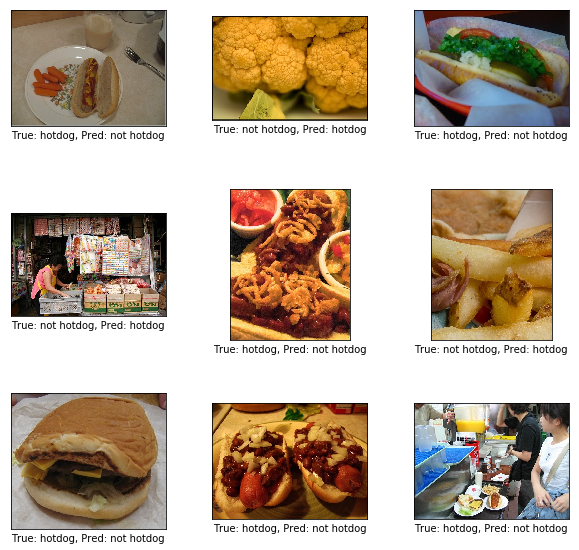

In [165]:
plot_images(sample_images, sample_cls_true, sample_cls_pred)


#  build convolutional neural network


In [16]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    available_device = device_lib.list_local_devices()
    return [device.name for device in available_device if device.device_type == 'GPU']

In [17]:
get_available_gpus()

['/device:GPU:0']

### Base CNN layer

#### Batch normalization

In [13]:
import tensorflow as tf
from tensorflow.python.training import moving_averages
def batch_norm( inputs, 
                decay = 0.999, 
                epsilon = 0.001):

    axis = list(range(len(inputs.get_shape()) - 1))
    out_chns = inputs.get_shape()[-1]

    beta = tf.get_variable('beta', [out_chns], initializer=tf.zeros_initializer)
    gamma = tf.get_variable('gamma', [out_chns], initializer=tf.ones_initializer())

    moving_mean = tf.get_variable('moving_mean', [out_chns], 
                                  initializer=tf.zeros_initializer,
                                  trainable=False)
    moving_variance = tf.get_variable('moving_variance', [out_chns],
                                      initializer=tf.ones_initializer(), 
                                      trainable=False)
    
    mean, variance = tf.nn.moments(inputs, axis)
    update_moving_mean = moving_averages.assign_moving_average(moving_mean, mean, decay)
    update_moving_variance = moving_averages.assign_moving_average(moving_variance, variance, decay)
    control_inputs = [update_moving_mean, update_moving_variance]

    with tf.control_dependencies(control_inputs):
        output = tf.nn.batch_normalization(inputs, mean, variance, beta, gamma, epsilon)
    return output

#### Convolutional layer

In [14]:
def conv2d( inputs,
            name,
            kernel_sz,
            out_chns,
            stride = 1,
            bn_params = None,
            weight_initializer = tf.contrib.layers.xavier_initializer_conv2d(),
            bias_initializer = tf.zeros_initializer,
            weight_regularizer = None,
            bias_regularizer = None,
            padding = 'SAME',
            non_linear_func = tf.nn.relu,
            use_bias = True):

    inp_chns = inputs.get_shape()[-1]

    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        kernel = tf.get_variable('weights',
                                 shape=[kernel_sz, kernel_sz, inp_chns, out_chns],
                                 initializer = weight_initializer,
                                 regularizer = weight_regularizer)

        conv  = tf.nn.conv2d(inputs, kernel, [1, stride, stride, 1], padding=padding)
        if use_bias :
            biases = tf.get_variable('biases', [out_chns],
                                     initializer = bias_initializer,
                                     regularizer = bias_regularizer)
            conv  = tf.nn.bias_add(conv, biases)

        if bn_params is not None:
            conv = batch_norm(conv, "BN", **bn_params)

        if non_linear_func is not None:
            conv = non_linear_func(conv, name=name)
    return conv

#### Pooling

In [15]:
def max_pool( inputs,
              name,
              kernel_sz = 2,
              stride = 2,
              padding='SAME') :
    
    return tf.nn.max_pool(inputs, 
                          ksize = [1, kernel_sz, kernel_sz, 1], 
                          strides = [1, stride, stride, 1], 
                          padding = padding, 
                          name = name)

#### Fully connected

In [16]:
def flatten(inputs):
    if len(inputs.get_shape()) < 2:
        raise ValueError('Inputs must be have a least 2 dimensions')
    dims = inputs.get_shape()[1:]
    k = dims.num_elements()
    return tf.reshape(inputs, [-1, k])

def fc( inputs,
        name,
        out_chns,
        bn_params = None,
        weight_initializer = tf.contrib.layers.xavier_initializer(),
        bias_initializer = tf.zeros_initializer,
        weight_regularizer = None,
        bias_regularizer = None,
        padding = 'SAME',
        non_linear_func = tf.nn.relu,
        use_bias = True):
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        weights = tf.get_variable('weights', shape=[inputs.get_shape()[1], out_chns],
                                  initializer = weight_initializer,
                                  regularizer = weight_regularizer)
        fc = tf.matmul(inputs, weights)

        if (use_bias):
            biases  = tf.get_variable('biases', shape=[out_chns],
                                      initializer = bias_initializer,
                                      regularizer = bias_regularizer)
            fc = tf.nn.bias_add(fc, biases)

        if bn_params is not None:
            fc = batch_norm(fc, "BN", **bn_params)

        if non_linear_func is not None:
            fc = non_linear_func(fc, name=name)

    return fc

### LeNet

In [17]:
def neural_input(dataset, size):
    X = []
    y = []
    for item in dataset:
        X.append(cv2.resize(item.image, size))
        y.append(item.cl)
    return np.array(X), np.array(y)

In [238]:
X_train, y_train = neural_input(train_dataset, (32, 32))
X_valid, y_valid = neural_input(valid_dataset, (32, 32))

In [239]:
images_ph = tf.placeholder(tf.uint8, shape = [None, 32, 32, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])

In [240]:
# Define LeNet
with tf.variable_scope("LeNet"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=5, out_chns=6, stride=1, padding="VALID")
    pool1 = max_pool(conv1, "pool1", kernel_sz=2, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1, padding="VALID")
    pool2 = max_pool(conv2, "pool2", kernel_sz=2, stride=2)
    reshape = flatten(pool2)
    fc1 = fc(reshape, 'fc1', 120)
    fc2 = fc(fc1, 'fc2', 84)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)

In [241]:
print(images_phf)
print(conv1)
print(pool1)
print(conv2)
print(pool2)
print(fc1)
print(fc2)
print(logits)
print(output)

Tensor("LeNet_2/mul:0", shape=(?, 32, 32, 3), dtype=float32)
Tensor("LeNet_2/conv1/conv1:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("LeNet_2/pool1:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("LeNet_2/conv2/conv2:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("LeNet_2/pool2:0", shape=(?, 5, 5, 16), dtype=float32)
Tensor("LeNet_2/fc1/fc1:0", shape=(?, 120), dtype=float32)
Tensor("LeNet_2/fc2/fc2:0", shape=(?, 84), dtype=float32)
Tensor("LeNet_2/logits/logits:0", shape=(?, 2), dtype=float32)
Tensor("LeNet_2/ArgMax:0", shape=(?,), dtype=int64)


In [242]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))

In [243]:
global_step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)

In [244]:
optimizer = tf.train.GradientDescentOptimizer(lr)
train_step = optimizer.minimize(loss, global_step = global_step)

In [18]:
def get_batch(X, y, size):
    X_batch = []
    y_batch = []
    for _ in range(size):
        indx = np.random.choice(X.shape[0])
        X_batch.append(X[indx])
        y_batch.append(y[indx])
    return np.array(X_batch), np.array(y_batch)

In [19]:
def net_accuracy(X, y, sess, network):
    y_true = []
    y_predict = []
    for image, cl in zip(X, y):
        y_true.append(cl)
        input_img = image.reshape([1, image.shape[0], image.shape[1], image.shape[2]])
        y_predict.append(sess.run(network, feed_dict={images_ph: input_img})[0])
    return accuracy(y_true, y_predict)

In [247]:
batch_size = 10
iter_cnt = 10000

In [249]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {:.6f}, lr = {:.10f}".format(i,
                                                                       batch_loss,
                                                                       sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {:.2f}%".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 0.692826, lr = 0.0099999998
  Train accuracy: 46.98%
  Valid accuracy: 48.74%
Iteration: 1000, loss = 0.365514, lr = 0.0099999998
Iteration: 2000, loss = 0.135600, lr = 0.0099999998
  Train accuracy: 88.09%
  Valid accuracy: 79.43%
Iteration: 3000, loss = 0.255911, lr = 0.0099999998
Iteration: 4000, loss = 0.143172, lr = 0.0099999998
  Train accuracy: 91.32%
  Valid accuracy: 80.26%
Iteration: 5000, loss = 0.154828, lr = 0.0099999998
Iteration: 6000, loss = 0.059679, lr = 0.0099999998
  Train accuracy: 99.46%
  Valid accuracy: 80.48%
Iteration: 7000, loss = 0.002556, lr = 0.0099999998
Iteration: 8000, loss = 0.005194, lr = 0.0099999998
  Train accuracy: 100.00%
  Valid accuracy: 81.57%
Iteration: 9000, loss = 0.010366, lr = 0.0099999998
Result:
  Valid accuracy: 81.20%


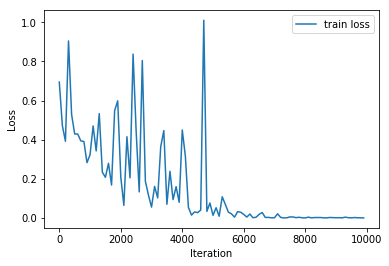

In [226]:
# Plot results   
plt.plot(range(0, iter_cnt, 100), losses, label="train loss")
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

#### Try to add regularization for reduce overfitting

In [275]:
weight_decay = 0.0001
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

In [276]:
images_ph = tf.placeholder(tf.uint8, shape = [None, 32, 32, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("LeNet_weightdecay_0.0001"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=5, out_chns=6, stride=1, padding="VALID",
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=2, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1, padding="VALID",
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=2, stride=2)
    reshape = flatten(pool2)
    fc1 = fc(reshape, 'fc1', 120, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 84,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [277]:
batch_size = 10
iter_cnt = 10000

In [278]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 1.020623803138733, lr = 0.009999999776482582
  Train accuracy: 57.92938360263315
  Valid accuracy: 51.76086956521739
Iteration: 1000, loss = 0.5319945812225342, lr = 0.009999999776482582
Iteration: 2000, loss = 0.6416402459144592, lr = 0.009999999776482582
  Train accuracy: 88.1508078994614
  Valid accuracy: 78.89130434782608
Iteration: 3000, loss = 0.4277331233024597, lr = 0.009999999776482582
Iteration: 4000, loss = 0.43033409118652344, lr = 0.009999999776482582
  Train accuracy: 92.81867145421903
  Valid accuracy: 76.06521739130436
Iteration: 5000, loss = 0.3500818610191345, lr = 0.009999999776482582
Iteration: 6000, loss = 0.2900259494781494, lr = 0.009999999776482582
  Train accuracy: 99.40155595451824
  Valid accuracy: 80.06521739130434
Iteration: 7000, loss = 0.27867087721824646, lr = 0.009999999776482582
Iteration: 8000, loss = 0.27413666248321533, lr = 0.009999999776482582
  Train accuracy: 100.0
  Valid accuracy: 80.26086956521739
Iteration: 9000, loss = 

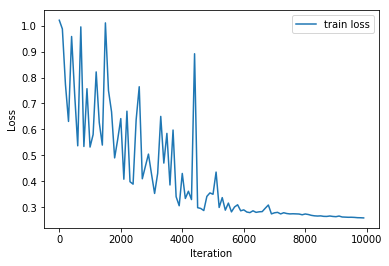

In [279]:
# Plot results   
plt.plot(range(0, iter_cnt, 100), losses, label="train loss")
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

#### Increase weight decay

In [280]:
weight_decay = 0.05
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 32, 32, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("LeNet_weightdecay_0.05"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=5, out_chns=6, stride=1, padding="VALID",
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=2, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1, padding="VALID",
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=2, stride=2)
    reshape = flatten(pool2)
    fc1 = fc(reshape, 'fc1', 120, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 84,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [281]:
batch_size = 10
iter_cnt = 10000

In [282]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 8.424164772033691, lr = 0.009999999776482582
  Train accuracy: 57.09156193895871
  Valid accuracy: 58.652173913043484
Iteration: 1000, loss = 3.3981008529663086, lr = 0.009999999776482582
Iteration: 2000, loss = 1.7323377132415771, lr = 0.009999999776482582
  Train accuracy: 80.31119090365051
  Valid accuracy: 75.19565217391305
Iteration: 3000, loss = 1.2416560649871826, lr = 0.009999999776482582
Iteration: 4000, loss = 1.0425539016723633, lr = 0.009999999776482582
  Train accuracy: 82.40574506283662
  Valid accuracy: 77.3695652173913
Iteration: 5000, loss = 0.9266386032104492, lr = 0.009999999776482582
Iteration: 6000, loss = 0.9096638560295105, lr = 0.009999999776482582
  Train accuracy: 84.91921005385996
  Valid accuracy: 78.69565217391305
Iteration: 7000, loss = 1.009324073791504, lr = 0.009999999776482582
Iteration: 8000, loss = 0.7404416799545288, lr = 0.009999999776482582
  Train accuracy: 85.57749850388988
  Valid accuracy: 79.02173913043478
Iteration: 9000

### AlexNet

In [284]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))

In [300]:
tf.reset_default_graph()

weight_decay = 0.005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=96, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=256, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=384, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    conv4 = conv2d(conv3, "conv4", kernel_sz=3, out_chns=384, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    conv5 = conv2d(conv4, "conv5", kernel_sz=3, out_chns=256, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool5 = max_pool(conv4, "pool5", kernel_sz=3, stride=2)
    
    reshape = flatten(pool2)
    fc1 = fc(reshape, 'fc1', 4096, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 4096,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [301]:
print(images_phf)
print(conv1)
print(pool1)
print(conv2)
print(pool2)
print(conv3)
print(conv4)
print(conv5)
print(pool5)
print(fc1)
print(fc2)
print(logits)

Tensor("AlexNet_weightdecay_0.005/mul:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv1/conv1:0", shape=(?, 56, 56, 96), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool1:0", shape=(?, 28, 28, 96), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv2/conv2:0", shape=(?, 28, 28, 256), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool2:0", shape=(?, 14, 14, 256), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv3/conv3:0", shape=(?, 14, 14, 384), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv4/conv4:0", shape=(?, 14, 14, 384), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv5/conv5:0", shape=(?, 14, 14, 256), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool5:0", shape=(?, 7, 7, 384), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc1/fc1:0", shape=(?, 4096), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc2/fc2:0", shape=(?, 4096), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/logits/logits:0", shape=(?, 2), dtype=f

In [302]:
batch_size = 10
iter_cnt = 10000

In [303]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 32.731300354003906, lr = 0.009999999776482582
  Train accuracy: 57.749850388988634
  Valid accuracy: 50.13043478260869
Iteration: 1000, loss = 29.428531646728516, lr = 0.009999999776482582
Iteration: 2000, loss = 26.265213012695312, lr = 0.009999999776482582
  Train accuracy: 97.06762417713944
  Valid accuracy: 82.47826086956522
Iteration: 3000, loss = 23.765256881713867, lr = 0.009999999776482582
Iteration: 4000, loss = 21.520925521850586, lr = 0.009999999776482582
  Train accuracy: 100.0
  Valid accuracy: 82.73913043478261
Iteration: 5000, loss = 19.461320877075195, lr = 0.009999999776482582
Iteration: 6000, loss = 17.612537384033203, lr = 0.009999999776482582
  Train accuracy: 100.0
  Valid accuracy: 83.1086956521739
Iteration: 7000, loss = 15.93907356262207, lr = 0.009999999776482582
Iteration: 8000, loss = 14.422579765319824, lr = 0.009999999776482582
  Train accuracy: 100.0
  Valid accuracy: 83.3913043478261
Iteration: 9000, loss = 13.053004264831543, lr = 0.

### SqueezeNet

In [21]:
X_train, y_train = neural_input(train_dataset, (112, 112))
X_valid, y_valid = neural_input(valid_dataset, (112, 112))

#### Average pooling

In [32]:
def avg_pool( inputs,
              name,
              kernel_sz = 2,
              stride = 2,
              padding='SAME') :
    
    return tf.nn.avg_pool(inputs, 
                          ksize = [1, kernel_sz, kernel_sz, 1], 
                          strides = [1, stride, stride, 1], 
                          padding = padding, 
                          name = name)

In [23]:
tf.reset_default_graph()

weight_decay = 0.001
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 112, 112, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])

# Define LeNet with regularization
def fire(inputs, name, chns):
    fire_1 = conv2d(inputs, '{}_1'.format(name), 1, chns // 4, padding = 'VALID',
                    weight_regularizer = regulizer, bias_regularizer = regulizer)
    fire_2 = conv2d(fire_1, '{}_2'.format(name), 1, chns, padding = 'VALID',
                    weight_regularizer = regulizer, bias_regularizer = regulizer)
    fire_3 = conv2d(fire_1, '{}_3'.format(name), 3, chns,
                    weight_regularizer = regulizer, bias_regularizer = regulizer)
    fire_concat = tf.concat([fire_2, fire_3], 3, name = '{}_concat'.format(name))
    
    return fire_concat

with tf.variable_scope("SqueezeNet_weightdecay_0.0005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, 'conv1', 3, 64, 2, padding = 'VALID',
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, 'pool1', 3, 2, padding = 'VALID')

    fire2 = fire(pool1, "fire2", 64)
    fire3 = fire(fire2, "fire3", 64)
    pool3 = max_pool(fire3, 'pool3', 3, 2, padding = 'VALID')
    
    fire4 = fire(pool3, "fire4", 128)
    fire5 = fire(fire4, "fire5", 128)
    pool5 = max_pool(fire5, 'pool5', 3, 2, padding = 'VALID')
    
    fire6 = fire(pool5, "fire6", 192)
    fire7 = fire(fire6, "fire7", 192)
    fire8 = fire(fire7, "fire8", 256)
    fire9 = fire(fire8, "fire9", 256)
    
    conv10 = conv2d(fire9, 'conv10', 1, 2, 1, padding = 'VALID',
                    weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool10 = avg_pool(conv10, 'pool10', 6, 1, padding = 'VALID')
    
    logits = flatten(pool10)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [24]:
print(images_phf)
print(conv1)
print(pool1)
print(fire2)
print(fire3)
print(pool3)
print(fire4)
print(fire5)
print(pool5)
print(fire6)
print(fire7)
print(fire8)
print(fire9)
print(conv10)
print(pool10)
print(logits)
print(output)

Tensor("SqueezeNet_weightdecay_0.0005/mul:0", shape=(?, 112, 112, 3), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/conv1/conv1:0", shape=(?, 55, 55, 64), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/pool1:0", shape=(?, 27, 27, 64), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/fire2_concat:0", shape=(?, 27, 27, 128), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/fire3_concat:0", shape=(?, 27, 27, 128), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/pool3:0", shape=(?, 13, 13, 128), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/fire4_concat:0", shape=(?, 13, 13, 256), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/fire5_concat:0", shape=(?, 13, 13, 256), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/pool5:0", shape=(?, 6, 6, 256), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/fire6_concat:0", shape=(?, 6, 6, 384), dtype=float32)
Tensor("SqueezeNet_weightdecay_0.0005/fire7_concat:0", shape=(?, 6, 6, 384), dtype=float32)
Tenso

In [25]:
batch_size = 32
iter_cnt = 100000
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 1000 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 10000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 1.487121820449829, lr = 0.009999999776482582
  Train accuracy: 57.63016157989228
  Valid accuracy: 50.0
Iteration: 1000, loss = 1.4371668100357056, lr = 0.009999999776482582
Iteration: 2000, loss = 1.4331135749816895, lr = 0.009999999776482582
Iteration: 3000, loss = 1.0354714393615723, lr = 0.009999999776482582
Iteration: 4000, loss = 1.0408155918121338, lr = 0.009999999776482582
Iteration: 5000, loss = 0.8314031362533569, lr = 0.009999999776482582
Iteration: 6000, loss = 1.0483661890029907, lr = 0.009999999776482582
Iteration: 7000, loss = 0.856142520904541, lr = 0.009999999776482582
Iteration: 8000, loss = 0.9907739162445068, lr = 0.009999999776482582
Iteration: 9000, loss = 1.0728676319122314, lr = 0.009999999776482582
Iteration: 10000, loss = 0.8564945459365845, lr = 0.004999999888241291
  Train accuracy: 92.1603830041891
  Valid accuracy: 83.08695652173913
Iteration: 11000, loss = 0.8583283424377441, lr = 0.004999999888241291
Iteration: 12000, loss = 0.709370

#### Add simple augmentation - vertical flip

In [42]:
def get_batch(X, y, size):
    X_batch = []
    y_batch = []
    for _ in range(size):
        indx = np.random.choice(X.shape[0])
        if np.random.choice([True, False]):
            X_batch.append(X[indx])
        else:
            X_batch.append(cv2.flip(X[indx], 1))
        y_batch.append(y[indx])
    return np.array(X_batch), np.array(y_batch)

#### Reduce channels in AlexNet

In [43]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))


tf.reset_default_graph()

weight_decay = 0.005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=16, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=48, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    conv4 = conv2d(conv3, "conv4", kernel_sz=3, out_chns=48, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    conv5 = conv2d(conv4, "conv5", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool5 = max_pool(conv4, "pool5", kernel_sz=3, stride=2)
    
    reshape = flatten(pool2)
    fc1 = fc(reshape, 'fc1', 128, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 128,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [44]:
print(images_phf)
print(conv1)
print(pool1)
print(conv2)
print(pool2)
print(conv3)
print(conv4)
print(conv5)
print(pool5)
print(fc1)
print(fc2)
print(logits)

Tensor("AlexNet_weightdecay_0.005/mul:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv1/conv1:0", shape=(?, 56, 56, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool1:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv2/conv2:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool2:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv3/conv3:0", shape=(?, 14, 14, 48), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv4/conv4:0", shape=(?, 14, 14, 48), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv5/conv5:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool5:0", shape=(?, 7, 7, 48), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc1/fc1:0", shape=(?, 128), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc2/fc2:0", shape=(?, 128), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/logits/logits:0", shape=(?, 2), dtype=float32)


In [45]:
batch_size = 10
iter_cnt = 10000

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 2.1818628311157227, lr = 0.009999999776482582
  Train accuracy: 42.309994015559546
  Valid accuracy: 47.73913043478261
Iteration: 1000, loss = 1.7919862270355225, lr = 0.009999999776482582
Iteration: 2000, loss = 1.5284069776535034, lr = 0.009999999776482582
  Train accuracy: 88.68940754039497
  Valid accuracy: 80.21739130434783
Iteration: 3000, loss = 1.3276467323303223, lr = 0.009999999776482582
Iteration: 4000, loss = 1.0669993162155151, lr = 0.009999999776482582
  Train accuracy: 95.81089168162777
  Valid accuracy: 82.78260869565217
Iteration: 5000, loss = 0.871559202671051, lr = 0.009999999776482582
Iteration: 6000, loss = 2.195021629333496, lr = 0.009999999776482582
  Train accuracy: 86.17594254937163
  Valid accuracy: 70.78260869565217
Iteration: 7000, loss = 0.7147030234336853, lr = 0.009999999776482582
Iteration: 8000, loss = 0.6514304876327515, lr = 0.009999999776482582
  Train accuracy: 100.0
  Valid accuracy: 84.34782608695653
Iteration: 9000, loss = 0.

#### Reduce more

In [20]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))


tf.reset_default_graph()

weight_decay = 0.005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=16, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    conv4 = conv2d(conv3, "conv4", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    conv5 = conv2d(conv4, "conv5", kernel_sz=3, out_chns=16, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool5 = max_pool(conv4, "pool5", kernel_sz=3, stride=2)
    
    reshape = flatten(pool2)
    fc1 = fc(reshape, 'fc1', 64, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 64,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.01, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [47]:
print(images_phf)
print(conv1)
print(pool1)
print(conv2)
print(pool2)
print(conv3)
print(conv4)
print(conv5)
print(pool5)
print(fc1)
print(fc2)
print(logits)

Tensor("AlexNet_weightdecay_0.005/mul:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv1/conv1:0", shape=(?, 56, 56, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool1:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv2/conv2:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool2:0", shape=(?, 14, 14, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv3/conv3:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv4/conv4:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv5/conv5:0", shape=(?, 14, 14, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool5:0", shape=(?, 7, 7, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc1/fc1:0", shape=(?, 64), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc2/fc2:0", shape=(?, 64), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/logits/logits:0", shape=(?, 2), dtype=float32)


In [48]:
batch_size = 10
iter_cnt = 10000

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 1.3972513675689697, lr = 0.009999999776482582
  Train accuracy: 57.63016157989228
  Valid accuracy: 50.39130434782608
Iteration: 1000, loss = 1.0968868732452393, lr = 0.009999999776482582
Iteration: 2000, loss = 0.7959164381027222, lr = 0.009999999776482582
  Train accuracy: 91.80131657690006
  Valid accuracy: 82.1304347826087
Iteration: 3000, loss = 1.0393388271331787, lr = 0.009999999776482582
Iteration: 4000, loss = 0.5305052399635315, lr = 0.009999999776482582
  Train accuracy: 95.39198084979054
  Valid accuracy: 82.67391304347827
Iteration: 5000, loss = 0.5011266469955444, lr = 0.009999999776482582
Iteration: 6000, loss = 0.445320188999176, lr = 0.009999999776482582
  Train accuracy: 99.10233393177738
  Valid accuracy: 84.8913043478261
Iteration: 7000, loss = 0.40717145800590515, lr = 0.009999999776482582
Iteration: 8000, loss = 0.37449437379837036, lr = 0.009999999776482582
  Train accuracy: 99.88031119090365
  Valid accuracy: 83.93478260869566
Iteration: 900

#### Delete two convolutional layers

In [54]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))


tf.reset_default_graph()

weight_decay = 0.005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=16, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool3 = max_pool(conv3, "pool3", kernel_sz=3, stride=2)
    
    reshape = flatten(pool3)
    fc1 = fc(reshape, 'fc1', 64, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 64,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.001, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [55]:
print(images_phf)
print(conv1)
print(pool1)
print(conv2)
print(pool2)
print(conv3)
print(pool3)
print(fc1)
print(fc2)
print(logits)

Tensor("AlexNet_weightdecay_0.005/mul:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv1/conv1:0", shape=(?, 56, 56, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool1:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv2/conv2:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool2:0", shape=(?, 14, 14, 16), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/conv3/conv3:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/pool3:0", shape=(?, 7, 7, 32), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc1/fc1:0", shape=(?, 64), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/fc2/fc2:0", shape=(?, 64), dtype=float32)
Tensor("AlexNet_weightdecay_0.005/logits/logits:0", shape=(?, 2), dtype=float32)


In [56]:
batch_size = 10
iter_cnt = 20000

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {}".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {}".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 1.390001654624939, lr = 0.0010000000474974513
  Train accuracy: 42.4296828246559
  Valid accuracy: 50.0
Iteration: 1000, loss = 1.006672739982605, lr = 0.0010000000474974513
Iteration: 2000, loss = 1.0368622541427612, lr = 0.0010000000474974513
  Train accuracy: 82.2262118491921
  Valid accuracy: 77.30434782608697
Iteration: 3000, loss = 0.9200030565261841, lr = 0.0010000000474974513
Iteration: 4000, loss = 0.7088585495948792, lr = 0.0010000000474974513
  Train accuracy: 85.45780969479354
  Valid accuracy: 79.82608695652173
Iteration: 5000, loss = 0.7601850032806396, lr = 0.0010000000474974513
Iteration: 6000, loss = 0.6348313689231873, lr = 0.0010000000474974513
  Train accuracy: 88.50987432675045
  Valid accuracy: 81.52173913043478
Iteration: 7000, loss = 0.8006527423858643, lr = 0.0010000000474974513
Iteration: 8000, loss = 0.6902614831924438, lr = 0.0010000000474974513
  Train accuracy: 89.82645122681029
  Valid accuracy: 82.54347826086956
Iteration: 9000, loss

#### Change optimizer

In [69]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))


tf.reset_default_graph()

weight_decay = 0.0005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=16, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool3 = max_pool(conv3, "pool3", kernel_sz=3, stride=2)
    
    reshape = flatten(pool3)
    fc1 = fc(reshape, 'fc1', 64, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc2 = fc(fc1, 'fc2', 64,
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    logits = fc(fc2, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.001, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.MomentumOptimizer(lr, 0.9)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [70]:
batch_size = 10
iter_cnt = 30000

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {:.2f}%".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 0.7590882182121277, lr = 0.0010000000474974513
  Train accuracy: 48.41%
  Valid accuracy: 47.30%
Iteration: 1000, loss = 0.3017713725566864, lr = 0.0010000000474974513
Iteration: 2000, loss = 0.26803451776504517, lr = 0.0010000000474974513
  Train accuracy: 86.54%
  Valid accuracy: 77.46%
Iteration: 3000, loss = 0.38593021035194397, lr = 0.0010000000474974513
Iteration: 4000, loss = 0.14943784475326538, lr = 0.0010000000474974513
  Train accuracy: 92.22%
  Valid accuracy: 83.00%
Iteration: 5000, loss = 0.08469059318304062, lr = 0.0010000000474974513
Iteration: 6000, loss = 0.16859346628189087, lr = 0.0010000000474974513
  Train accuracy: 97.79%
  Valid accuracy: 84.33%
Iteration: 7000, loss = 0.1018780916929245, lr = 0.0010000000474974513
Iteration: 8000, loss = 0.07956653833389282, lr = 0.0010000000474974513
  Train accuracy: 98.98%
  Valid accuracy: 84.02%
Iteration: 9000, loss = 0.14337818324565887, lr = 0.0010000000474974513
Iteration: 10000, loss = 0.062737688

#### Reduce one fully convolutional layer and add dropout

In [29]:
import tensorflow as tf
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))


tf.reset_default_graph()

weight_decay = 0.0005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=16, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool3 = max_pool(conv3, "pool3", kernel_sz=3, stride=2)
    
    reshape = flatten(pool3)
    fc1 = fc(reshape, 'fc1', 64, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc1 = tf.nn.dropout(fc1, 0.50)
    logits = fc(fc1, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.001, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.MomentumOptimizer(lr, 0.9)
    train_step = optimizer.minimize(loss, global_step = global_step)

NameError: name 'conv2d' is not defined

In [72]:
batch_size = 10
iter_cnt = 30000

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {:.2f}%".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 0.7646768689155579, lr = 0.0010000000474974513
  Train accuracy: 56.13%
  Valid accuracy: 51.80%
Iteration: 1000, loss = 0.5536686182022095, lr = 0.0010000000474974513
Iteration: 2000, loss = 0.6239361763000488, lr = 0.0010000000474974513
  Train accuracy: 88.21%
  Valid accuracy: 82.00%
Iteration: 3000, loss = 0.1654156893491745, lr = 0.0010000000474974513
Iteration: 4000, loss = 0.15181952714920044, lr = 0.0010000000474974513
  Train accuracy: 90.84%
  Valid accuracy: 83.33%
Iteration: 5000, loss = 0.3575482666492462, lr = 0.0010000000474974513
Iteration: 6000, loss = 0.07552239298820496, lr = 0.0010000000474974513
  Train accuracy: 92.22%
  Valid accuracy: 84.87%
Iteration: 7000, loss = 0.1421908289194107, lr = 0.0010000000474974513
Iteration: 8000, loss = 0.29953503608703613, lr = 0.0010000000474974513
  Train accuracy: 93.66%
  Valid accuracy: 81.02%
Iteration: 9000, loss = 0.48372554779052734, lr = 0.0010000000474974513
Iteration: 10000, loss = 0.215087041258

### More augmentation

In [27]:
def augment_brightness(image):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    hsv[:,:,2] = hsv[:,:,2]*random_bright
    return cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

def transform_image(img,ang_range,shear_range,trans_range,brightness=False):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    # Brightness
    if brightness:
      img = augment_brightness(img)

    return img

In [78]:
sample_images, sample_cls = random_sample(train_dataset)

In [79]:
for i in range(len(sample_images)):
    sample_images[i] = transform_image(sample_images[i], 20, 10, 5, True)

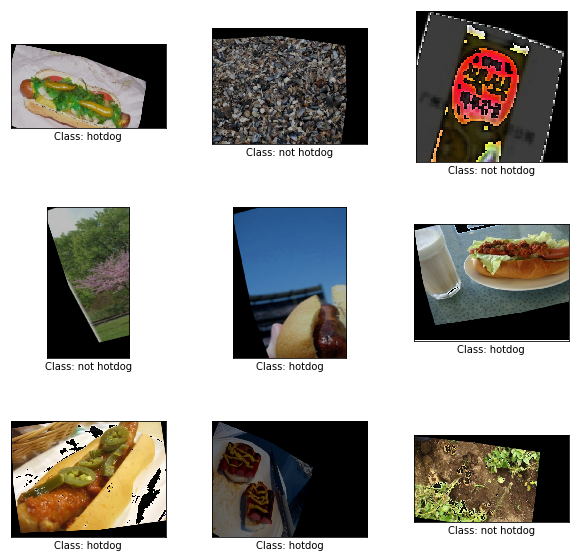

In [80]:
plot_images(sample_images, sample_cls)

In [81]:
def get_batch(X, y, size):
    X_batch = []
    y_batch = []
    for _ in range(size):
        indx = np.random.choice(X.shape[0])
        img = X[indx]
        if np.random.choice([True, False]):
            img = cv2.flip(X[indx], 1)
        X_batch.append(transform_image(img, 20, 10, 5, True))
        y_batch.append(y[indx])
    return np.array(X_batch), np.array(y_batch)

In [82]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))


tf.reset_default_graph()

weight_decay = 0.0005
regulizer = tf.contrib.layers.l2_regularizer(weight_decay)

images_ph = tf.placeholder(tf.uint8, shape = [None, 224, 224, 3])
labels_ph = tf.placeholder(tf.int32, shape = [None])
# Define LeNet with regularization
with tf.variable_scope("AlexNet_weightdecay_0.005"):
    images_phf = 2.0 * ((tf.to_float(images_ph) / 255.) - 0.5)
    conv1 = conv2d(images_phf, "conv1", kernel_sz=11, out_chns=16, stride=4,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool1 = max_pool(conv1, "pool1", kernel_sz=3, stride=2)
    conv2 = conv2d(pool1, "conv2", kernel_sz=5, out_chns=16, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool2 = max_pool(conv2, "pool2", kernel_sz=3, stride=2)
    conv3 = conv2d(pool2, "conv3", kernel_sz=3, out_chns=32, stride=1,
                   weight_regularizer = regulizer, bias_regularizer = regulizer)
    pool3 = max_pool(conv3, "pool3", kernel_sz=3, stride=2)
    
    reshape = flatten(pool3)
    fc1 = fc(reshape, 'fc1', 64, 
             weight_regularizer = regulizer, bias_regularizer = regulizer)
    fc1 = tf.nn.dropout(fc1, 0.50)
    logits = fc(fc1, 'logits', 2)
    output = tf.argmax(logits, axis=1)
    # Loss 
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))
    loss += tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
    # Train operation
    global_step = tf.Variable(0, trainable=False)
    lr = tf.train.exponential_decay(0.001, global_step, 10000, 0.5, staircase=True)
    optimizer = tf.train.MomentumOptimizer(lr, 0.9)
    train_step = optimizer.minimize(loss, global_step = global_step)

In [83]:
batch_size = 10
iter_cnt = 30000

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iter_cnt):
        X_batch, y_batch = get_batch(X_train, y_train, batch_size)
        feed_dict = {images_ph: X_batch, labels_ph: y_batch}
        _, batch_loss, batch_logits = sess.run([train_step, loss, logits],
                                               feed_dict=feed_dict)
        if i % 100 == 0:
            losses.append(batch_loss)
        if i % 1000 == 0:
            print("Iteration: {}, loss = {}, lr = {}".format(i, batch_loss, sess.run(lr)))
        if i % 2000 == 0:
            print("  Train accuracy: {:.2f}%".format(net_accuracy(X_train, y_train, sess, output)))
            print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))
    print("Result:")
    print("  Valid accuracy: {:.2f}%".format(net_accuracy(X_valid, y_valid, sess, output)))

Iteration: 0, loss = 0.750921368598938, lr = 0.0010000000474974513
  Train accuracy: 49.73%
  Valid accuracy: 47.50%
Iteration: 1000, loss = 0.40515315532684326, lr = 0.0010000000474974513
Iteration: 2000, loss = 0.44539427757263184, lr = 0.0010000000474974513
  Train accuracy: 78.82%
  Valid accuracy: 74.24%
Iteration: 3000, loss = 0.44191378355026245, lr = 0.0010000000474974513
Iteration: 4000, loss = 0.2844978868961334, lr = 0.0010000000474974513
  Train accuracy: 86.18%
  Valid accuracy: 79.57%
Iteration: 5000, loss = 0.37933915853500366, lr = 0.0010000000474974513
Iteration: 6000, loss = 0.43305540084838867, lr = 0.0010000000474974513
  Train accuracy: 87.01%
  Valid accuracy: 79.52%
Iteration: 7000, loss = 0.2744711637496948, lr = 0.0010000000474974513
Iteration: 8000, loss = 0.3511013984680176, lr = 0.0010000000474974513
  Train accuracy: 88.87%
  Valid accuracy: 82.20%
Iteration: 9000, loss = 0.2426927387714386, lr = 0.0010000000474974513
Iteration: 10000, loss = 0.307063639163

## use pretrained models from Keras

In [21]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model

vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.summary()

for layer in vgg16.layers:
    layer.trainable = False

x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

my_model = Model(input=vgg16.input, output=x)
my_model.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("in...)`
  from ipykernel import kernelapp as app


In [22]:
import keras
y_train = keras.utils.to_categorical(y_train, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)

In [23]:
from keras.optimizers import Adam
my_model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                 metrics=['accuracy'])

my_model.fit(X_train, y_train,
             batch_size=10,
             epochs=10,
             verbose=1,
             validation_data=(X_valid, y_valid))
score = my_model.evaluate(X_valid, y_valid, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Train on 1671 samples, validate on 4600 samples
Epoch 1/10
1671/1671 [==============================] - 32s 19ms/step - loss: 0.1773 - acc: 0.9467 - val_loss: 0.4682 - val_acc: 0.9052
Epoch 2/10
1671/1671 [==============================] - 31s 18ms/step - loss: 0.0456 - acc: 0.9838 - val_loss: 0.3818 - val_acc: 0.9241
Epoch 3/10
1671/1671 [==============================] - 31s 19ms/step - loss: 0.0144 - acc: 0.9946 - val_loss: 0.4034 - val_acc: 0.9248
Epoch 4/10
1671/1671 [==============================] - 31s 19ms/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.4813 - val_acc: 0.9057
Epoch 5/10
1671/1671 [==============================] - 31s 19ms/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.4113 - val_acc: 0.9215
Epoch 6/10
1671/1671 [==============================] - 31s 19ms/step - loss: 6.9797e-04 - acc: 1.0000 - val_loss: 0.4200 - val_acc: 0.9220
Epoch 7/10
1671/1671 [==============================] - 31s 19ms/step - loss: 3.5313e-04 - acc: 1.0000 - val_loss: 0.4139 - val_acc:

In [29]:
def get_augment_dataset(dataset, size):
    X = []
    y = []
    for item in dataset:
        img = cv2.resize(item.image, size)
        for i in range(10):
            aug = img
            if np.random.choice([True, False]):
                aug = cv2.flip(aug, 1)
            aug = transform_image(aug, 20, 10, 5, True)
            X.append(aug)
            y.append(item.cl)
    return np.array(X), np.array(y)

In [34]:
X_train, y_train = get_augment_dataset(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))

In [35]:
vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.summary()

for layer in vgg16.layers:
    layer.trainable = False

x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

my_model = Model(input=vgg16.input, output=x)
my_model.summary()

y_train = keras.utils.to_categorical(y_train, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [36]:
from keras.optimizers import Adam
my_model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                 metrics=['accuracy'])

my_model.fit(X_train, y_train,
             batch_size=10,
             epochs=10,
             verbose=1,
             validation_data=(X_valid, y_valid))
score = my_model.evaluate(X_valid, y_valid, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Train on 16710 samples, validate on 4600 samples
Epoch 1/10
16710/16710 [==============================] - 108s 6ms/step - loss: 0.1843 - acc: 0.9471 - val_loss: 0.6111 - val_acc: 0.9102
Epoch 2/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.1190 - acc: 0.9671 - val_loss: 0.6771 - val_acc: 0.9165
Epoch 3/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0966 - acc: 0.9742 - val_loss: 0.8927 - val_acc: 0.8939
Epoch 4/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0851 - acc: 0.9785 - val_loss: 0.9139 - val_acc: 0.8996
Epoch 5/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0744 - acc: 0.9800 - val_loss: 0.9973 - val_acc: 0.8926
Epoch 6/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0635 - acc: 0.9829 - val_loss: 1.0667 - val_acc: 0.8870
Epoch 7/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0566 - acc: 0.9851 - val_loss: 1.0919 - v

#### Random crop

In [39]:
def random_crop(dataset, resize_size, crop_size):
    X = []
    y = []
    for item in dataset:
        img = item.image
        w = img.shape[1]
        h = img.shape[0]
        if h > w:
            img = cv2.resize(img, (resize_size, int(resize_size * h / float(w))))
        else:
            img = cv2.resize(img, (int(resize_size * w / float(h)), resize_size))
        
        for i in range(10):
            w = np.random.choice(range(0, img.shape[1] - crop_size - 1))
            h = np.random.choice(range(0, img.shape[0] - crop_size - 1))
            X.append(img[h:h+crop_size, w:w+crop_size])
            y.append(item.cl)
    return np.array(X), np.array(y)

In [40]:
X_train, y_train = random_crop(train_dataset, 256, 224)
X_valid, y_valid = neural_input(valid_dataset, (224, 224))

In [41]:
vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.summary()

for layer in vgg16.layers:
    layer.trainable = False

x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

my_model = Model(input=vgg16.input, output=x)
my_model.summary()

y_train = keras.utils.to_categorical(y_train, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [42]:
from keras.optimizers import Adam
my_model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                 metrics=['accuracy'])

my_model.fit(X_train, y_train,
             batch_size=10,
             epochs=10,
             verbose=1,
             validation_data=(X_valid, y_valid))
score = my_model.evaluate(X_valid, y_valid, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Train on 16710 samples, validate on 4600 samples
Epoch 1/10
16710/16710 [==============================] - 109s 7ms/step - loss: 0.0597 - acc: 0.9847 - val_loss: 0.5632 - val_acc: 0.9217
Epoch 2/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0161 - acc: 0.9957 - val_loss: 0.6304 - val_acc: 0.9313
Epoch 3/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0183 - acc: 0.9956 - val_loss: 0.7897 - val_acc: 0.9200
Epoch 4/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0094 - acc: 0.9978 - val_loss: 0.8327 - val_acc: 0.9180
Epoch 5/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0143 - acc: 0.9972 - val_loss: 1.0269 - val_acc: 0.9085
Epoch 6/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 0.9209 - val_acc: 0.9191
Epoch 7/10
16710/16710 [==============================] - 110s 7ms/step - loss: 0.0060 - acc: 0.9987 - val_loss: 1.2032 - v

### Extract features with VGG16

In [45]:
vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.summary()


x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

my_model = Model(input=vgg16.input, output=vgg16.layers[-2].output)
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fc..., inputs=Tensor("in...)`
  import sys


In [46]:
from keras.applications.vgg16 import preprocess_input


X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))

train_features = []
valid_features = []

for i in range(X_train.shape[0]):
    img = X_train[i]
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    train_features.append(my_model.predict(img))
 
for i in range(X_valid.shape[0]):
    img = X_valid[i]
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    valid_features.append(my_model.predict(img))
    
X_train = np.array(train_features)
X_valid = np.array(valid_features)

In [48]:
train_features = []
valid_features = []

for i in range(X_train.shape[0]):
    train_features.append(X_train[i][0])
 
for i in range(X_valid.shape[0]):
    valid_features.append(X_valid[i][0])

X_train = np.array(train_features)
X_valid = np.array(valid_features)

In [49]:
X_train.shape

(1671, 4096)

/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 88.43%


/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/sklearn/preprocessing/labe

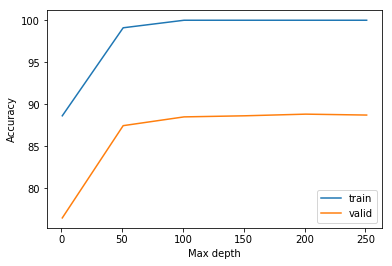

Best accuracy: 88.83%, number of tree = 201


In [52]:
from xgboost import XGBClassifier
# Train classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))
# Search best tree count
valid_scores = []
train_scores = []
grid = range(1, 300, 50)
for n_estimators in grid:
    clf = XGBClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    # Train score
    y_train_predict = clf.predict(X_train)
    train_scores.append(accuracy(y_train, y_train_predict))
    # Valid score
    y_valid_predict = clf.predict(X_valid)
    valid_scores.append(accuracy(y_valid, y_valid_predict))
# Plot results   
plt.plot(grid, train_scores, label="train")
plt.plot(grid, valid_scores, label="valid")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()
print("Best accuracy: {:.2f}%, number of tree = {}".format(max(valid_scores), grid[np.argmax(valid_scores)]))

In [54]:
from catboost import CatBoostClassifier
# Train classifier
clf = CatBoostClassifier(verbose=False)
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 89.11%


In [55]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
# Predict
y_valid_predict = clf.predict(X_valid)
print("Accuracy: {:.2f}%".format(accuracy(y_valid, y_valid_predict)))

Accuracy: 90.33%


In [61]:
X_train, y_train = neural_input(train_dataset, (224, 224))
X_valid, y_valid = neural_input(valid_dataset, (224, 224))

y_train = keras.utils.to_categorical(y_train, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)

In [62]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model

vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.summary()

for layer in vgg16.layers:
    layer.trainable = False

x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

my_model = Model(input=vgg16.input, output=x)
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/zharikov-a/tensorflow-gpu_python3/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("in...)`
  from ipykernel import kernelapp as app


In [63]:
from keras.optimizers import Adam
my_model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                 metrics=['accuracy'])

my_model.fit(X_train, y_train,
             batch_size=10,
             epochs=10,
             verbose=1)
score = my_model.evaluate(X_valid, y_valid, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Epoch 1/10
1671/1671 [==============================] - 13s 8ms/step - loss: 0.1690 - acc: 0.9467
Epoch 2/10
1671/1671 [==============================] - 10s 6ms/step - loss: 0.0467 - acc: 0.9832
Epoch 3/10
1671/1671 [==============================] - 10s 6ms/step - loss: 0.0303 - acc: 0.9880
Epoch 4/10
1671/1671 [==============================] - 10s 6ms/step - loss: 0.0049 - acc: 0.9982
Epoch 5/10
1671/1671 [==============================] - 10s 6ms/step - loss: 0.0016 - acc: 1.0000
Epoch 6/10
1671/1671 [==============================] - 10s 6ms/step - loss: 4.2571e-04 - acc: 1.0000
Epoch 7/10
1671/1671 [==============================] - 10s 6ms/step - loss: 3.1586e-04 - acc: 1.0000
Epoch 8/10
1671/1671 [==============================] - 10s 6ms/step - loss: 2.6472e-04 - acc: 1.0000
Epoch 9/10
1671/1671 [==============================] - 10s 6ms/step - loss: 2.2948e-04 - acc: 1.0000
Epoch 10/10
1671/1671 [==============================] - 10s 6ms/step - loss: 2.1002e-04 - acc: 1.0000

In [88]:
test_images = [(name, cv2.imread('./data/test/'+name)) 
               for name in sorted(os.listdir('./data/test/'))]

In [89]:
len(test_images)

325

In [90]:
resize_test_images = [(name, cv2.resize(img, (224, 224))) for name, img in test_images]

In [91]:
len(resize_test_images)

325

In [92]:
resize_test_images[0][1].shape

(224, 224, 3)

In [93]:
y_test_predict = []
file = open('submit.txt', 'w')
for name, img in resize_test_images:
    predict = my_model.predict(np.expand_dims(img, axis=0))[0]
    cl = 1 if predict[1] > predict[0] else 0
    file.write("{} {}\n".format(name, cl))
file.close()